# **(Feature_Engineering)**

## Objectives

* Cleaning the datasets.
* Evaluating the missing datas.

## Inputs

* Input dataset link : inputs/housing_prices_datasets/house_prices_records.csv 

## Outputs

* Creating cleaned datasets for Train and Tests sets and save them at outputs/housing_prices_datasets/clean_datasets 

## CRISP-DM

* Performing Data Preparation task. 


# Conclusion

* Arbitrary Imputation: '2ndFlrSF', 'EnclosedPorch', 'WoodDeckSF'
* Median Imputation: BedroomAbvGr', 'LotFrontage', 'GarageYrBlt', 'MasVnrArea'
* Most Frequent Imputation: 'BsmtFinType1', 'GarageFinish'

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [4]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-project/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [5]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [6]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing-project'

---

# Loading collected Kaggle datasets

In [7]:
import pandas as pd
df = pd.read_csv(f"outputs/datasets_collection/housing_prices.csv")
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration for missing data

* Identification of any missing variables in the data.

In [8]:
missing_data_vars = df.columns[df.isna().sum() > 0].to_list()
df.filter(missing_data_vars).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtFinType1   1346 non-null   object 
 3   EnclosedPorch  136 non-null    float64
 4   GarageFinish   1298 non-null   object 
 5   GarageYrBlt    1379 non-null   float64
 6   LotFrontage    1201 non-null   float64
 7   MasVnrArea     1452 non-null   float64
 8   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(2)
memory usage: 102.8+ KB


* Profile report for checking the distribution of variables with missing data.

In [9]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df=df[missing_data_vars], minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Missing Data Assessment

* Function for evaluating data with missing values.

In [10]:
def evaluate_missing_data(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                          data={"RowsWithMissingData": missing_data_absolute,
                                "PercentageOfDataset": missing_data_percentage,
                                "DataType": df.dtypes}
                    )
                    .sort_values(by=['PercentageOfDataset'], ascending=False)
                    .query("PercentageOfDataset > 0")
                    )

    return df_missing_data

* Checking missing data from collected datasets.

In [11]:
evaluate_missing_data(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


* Assessment suggests that two variables EnclosedPorch, WoodDeckSF are missing values more than 85% each.

# Handling the missing data

* Different approaches for variable levels with the missing data.

### Arbitrary Number Imputation

* Variables to handled : LotFrontage, GarageYrBlt & BedroomAbvGr.

In [19]:
arbitrary_imputation_variables = ['LotFrontage', 'GarageYrBlt', 'BedroomAbvGr']
arbitrary_imputation_variables

['LotFrontage', 'GarageYrBlt', 'BedroomAbvGr']

In [20]:
from feature_engine.imputation import ArbitraryNumberImputer
arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=0,
                                           variables=arbitrary_imputation_variables)
df_cleaned = df.copy()
df_cleaned = arbitrary_imputer.fit_transform(df_cleaned)
df_cleaned.filter(arbitrary_imputation_variables).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1460 non-null   float64
 1   GarageYrBlt   1460 non-null   float64
 2   BedroomAbvGr  1460 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


### Median Imputation

* Variables to handled : 2ndFlrSF, MasVnrArea, EnclosedPorch & WoodDeckSF.

In [23]:
median_imputation_variables = ['2ndFlrSF', 'MasVnrArea', 'EnclosedPorch', 'WoodDeckSF']
median_imputation_variables

['2ndFlrSF', 'MasVnrArea', 'EnclosedPorch', 'WoodDeckSF']

In [24]:
from feature_engine.imputation import MeanMedianImputer
median_imputer = MeanMedianImputer(imputation_method='median',
                                   variables=median_imputation_variables)
df_cleaned = median_imputer.fit_transform(df_cleaned)
df_cleaned.filter(median_imputation_variables).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1460 non-null   float64
 1   MasVnrArea     1460 non-null   float64
 2   EnclosedPorch  1460 non-null   float64
 3   WoodDeckSF     1460 non-null   float64
dtypes: float64(4)
memory usage: 45.8 KB


### Categorical imputation

* Variables to handled : GarageFinish, BsmtFinType1.

In [25]:
categorical_imputation_variables = ['GarageFinish', 'BsmtFinType1']
categorical_imputation_variables

['GarageFinish', 'BsmtFinType1']

In [26]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer = CategoricalImputer(imputation_method='frequent',
                                         variables=categorical_imputation_variables)
df_cleaned = categorical_imputer.fit_transform(df_cleaned)
df_cleaned.filter(categorical_imputation_variables).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   GarageFinish  1460 non-null   object
 1   BsmtFinType1  1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


# Data Cleaning Assessment


* Distribution Effect Analysis After Data Cleaning Method in the following variables:
['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'EnclosedPorch', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea', 'WoodDeckSF'] 




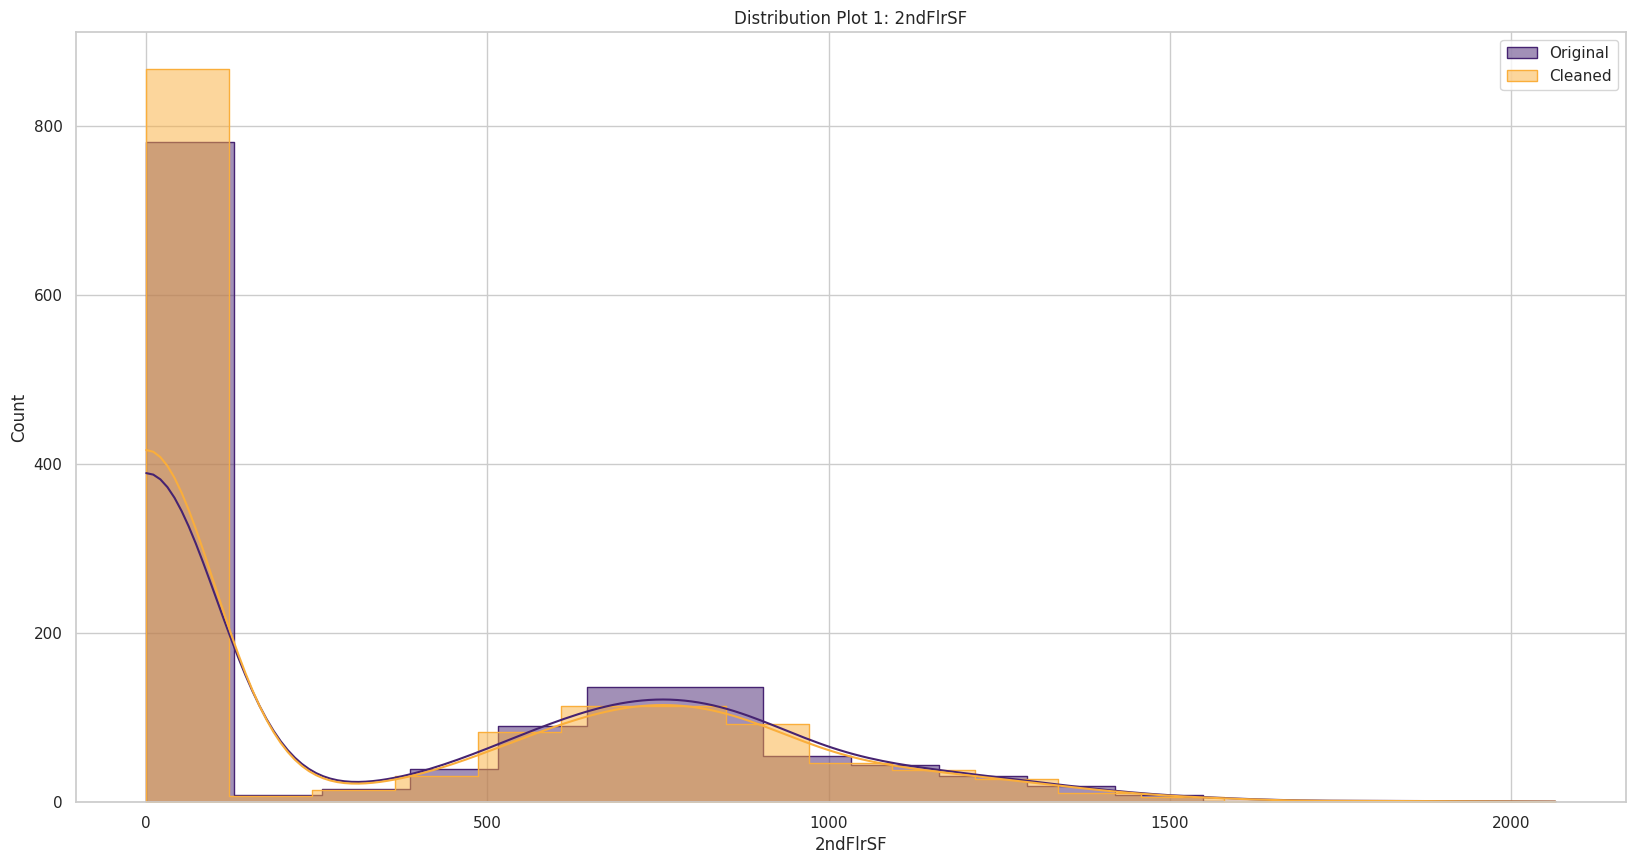

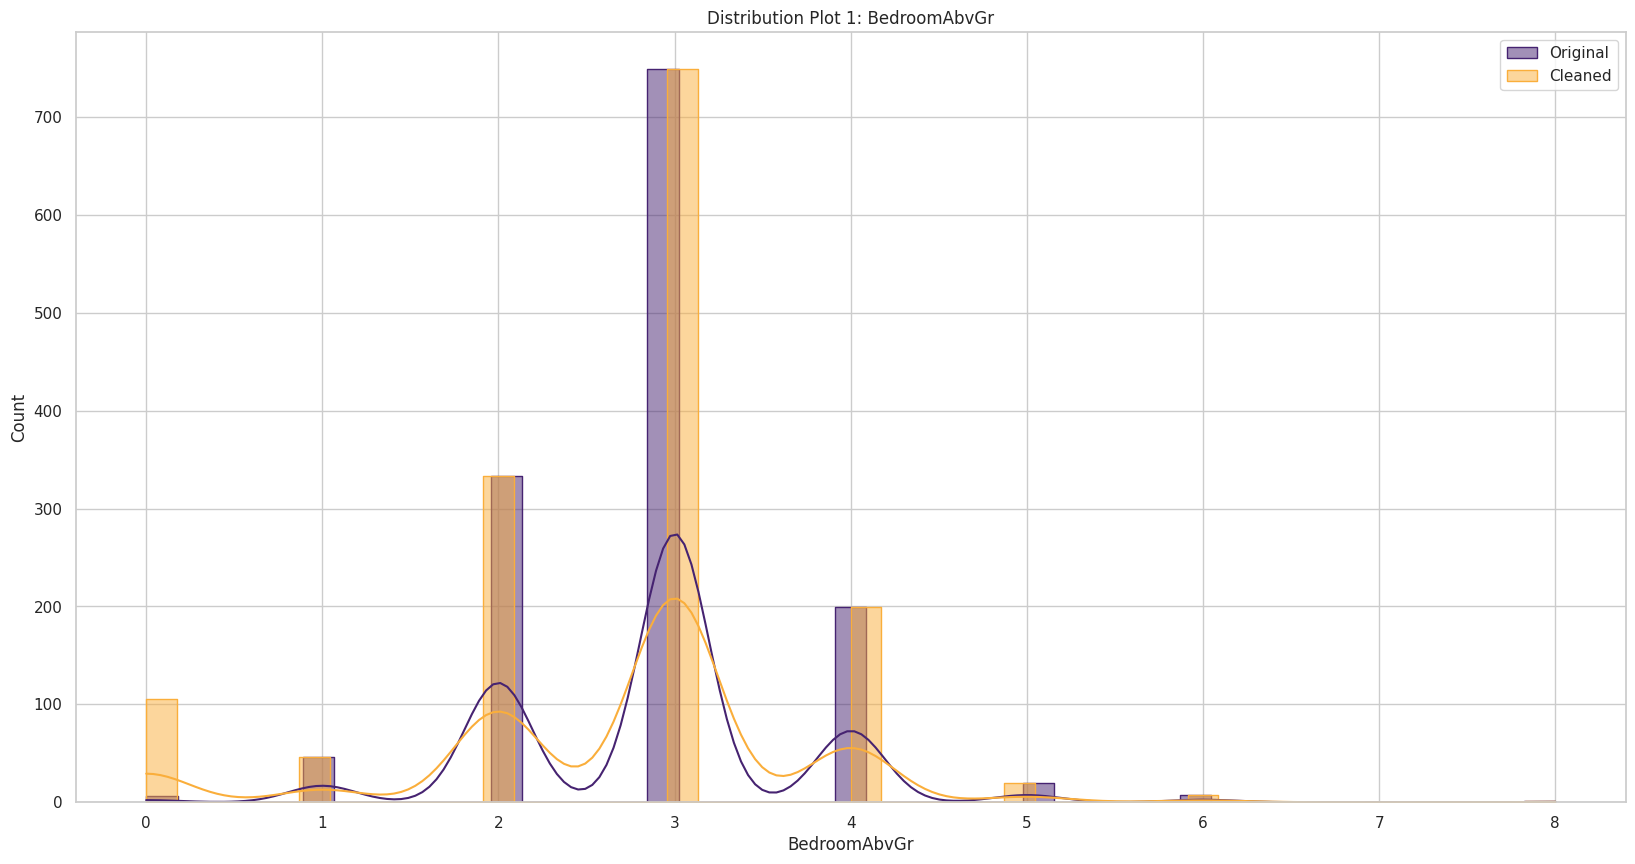

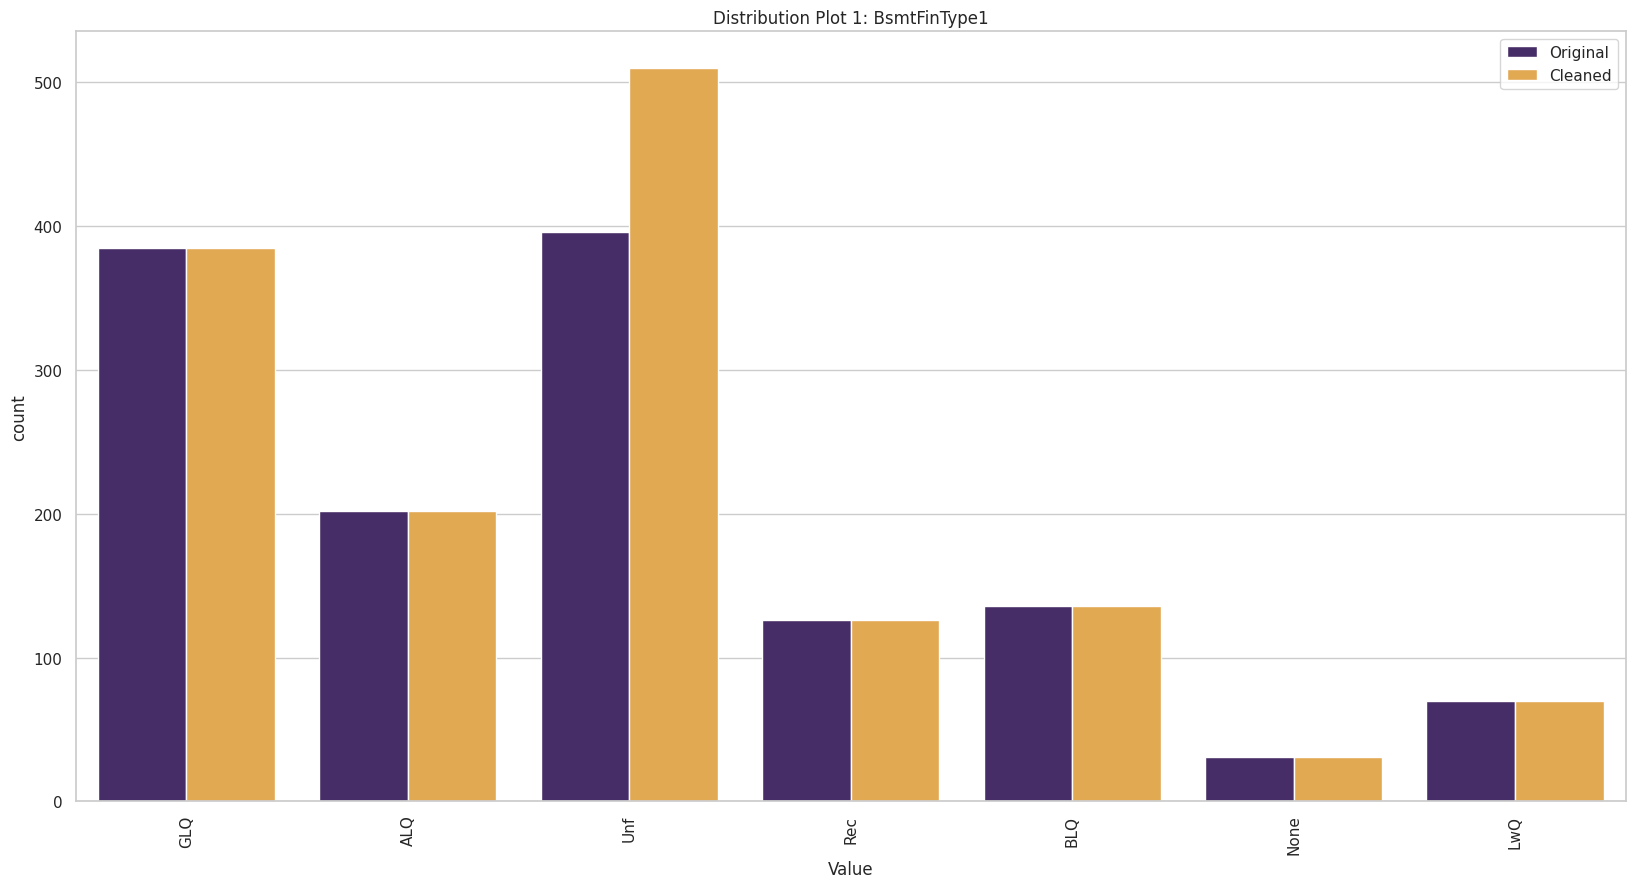

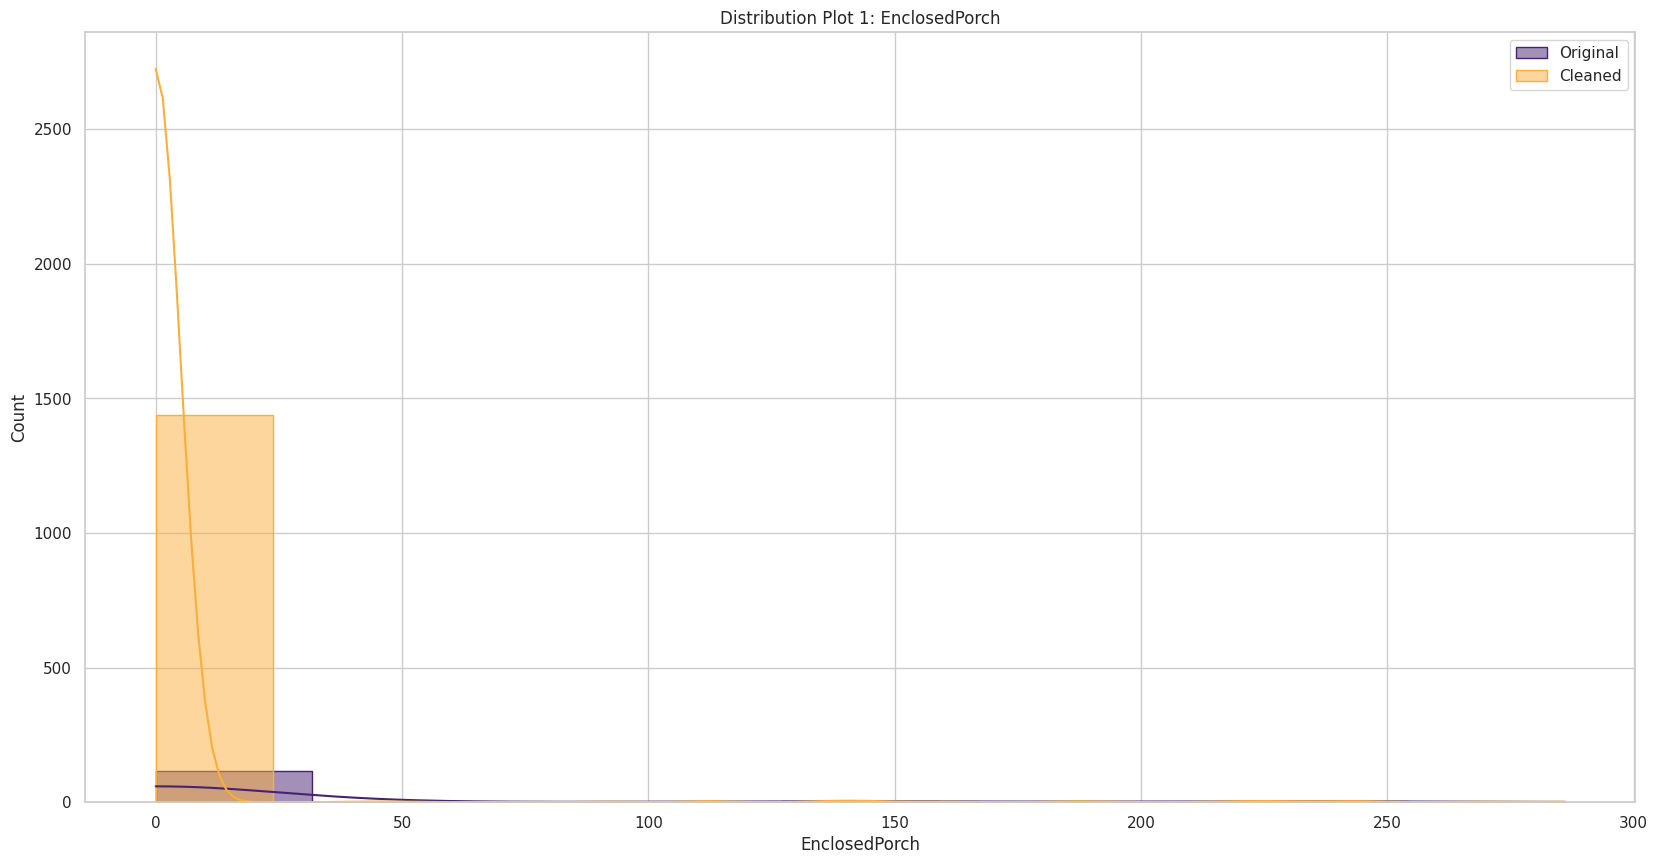

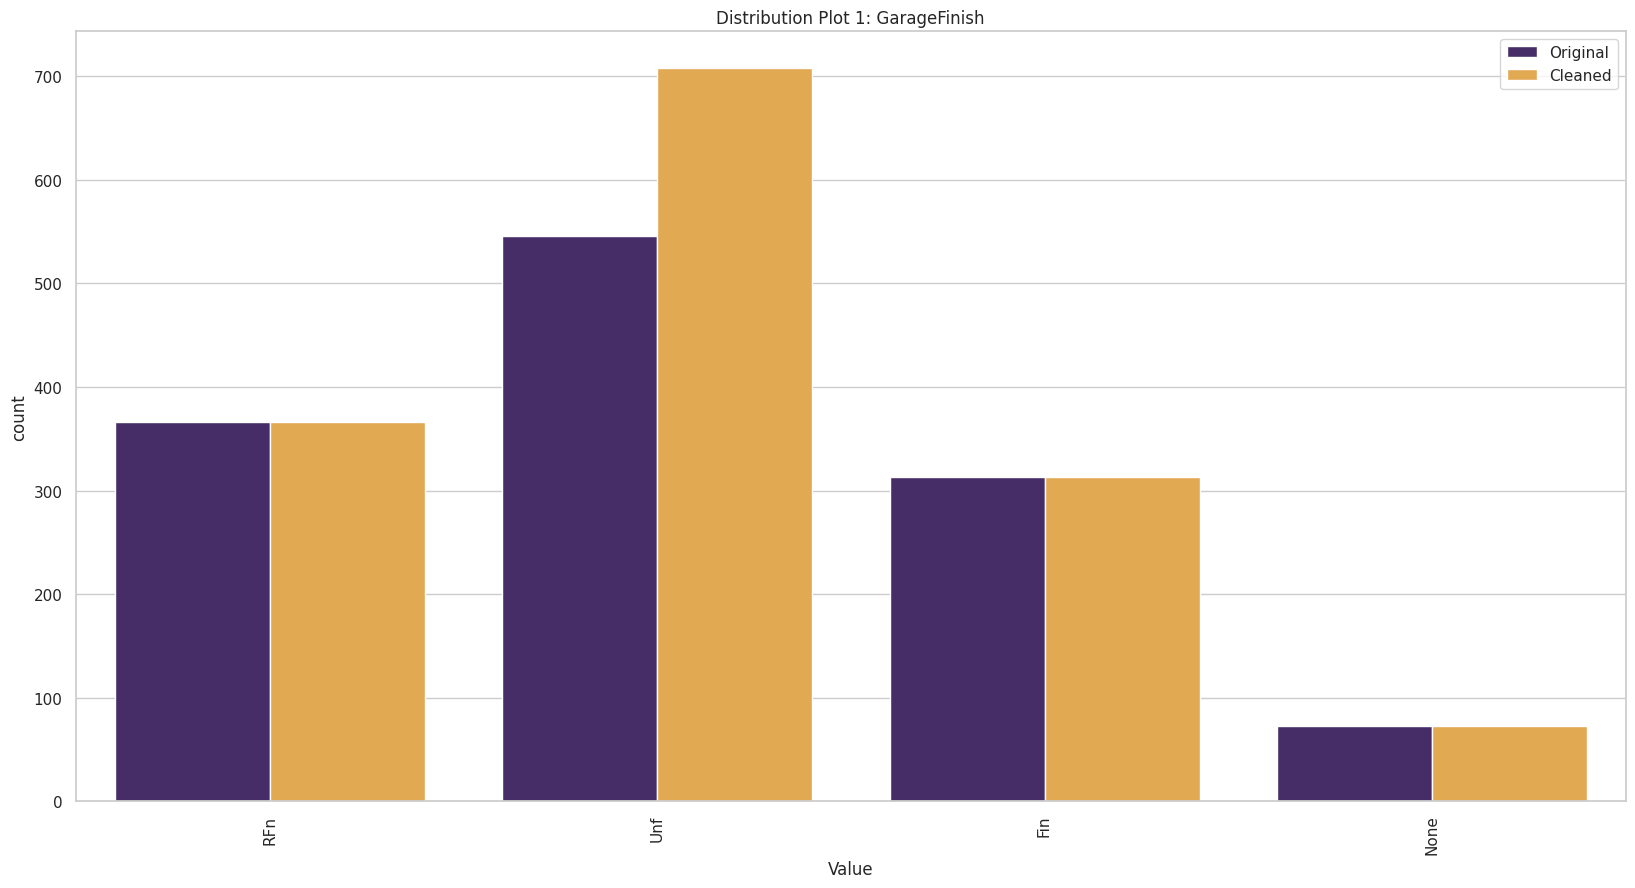

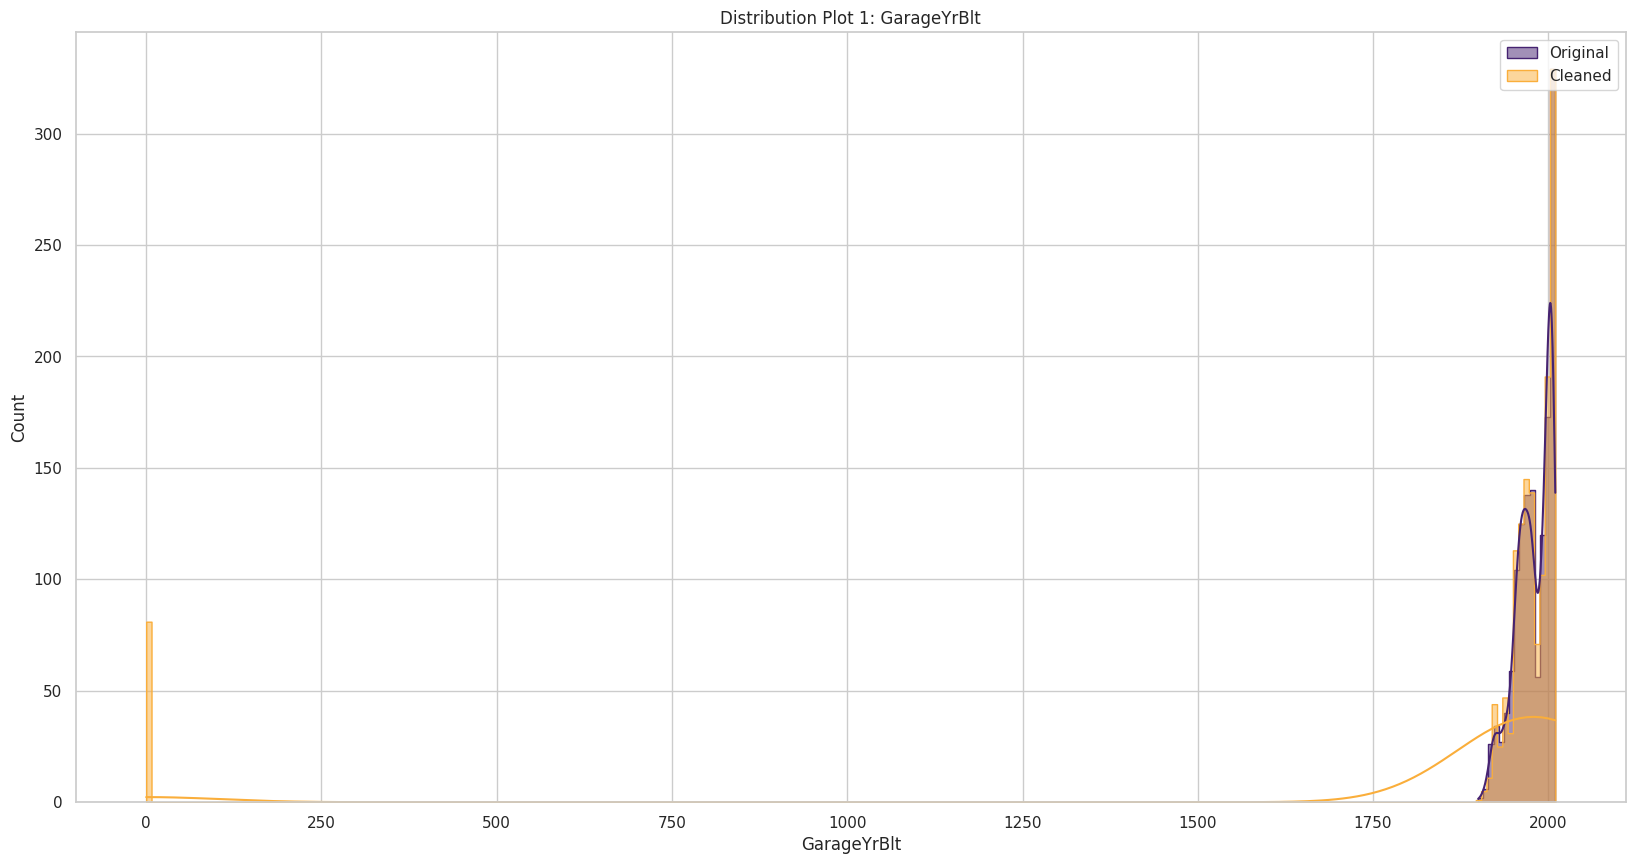

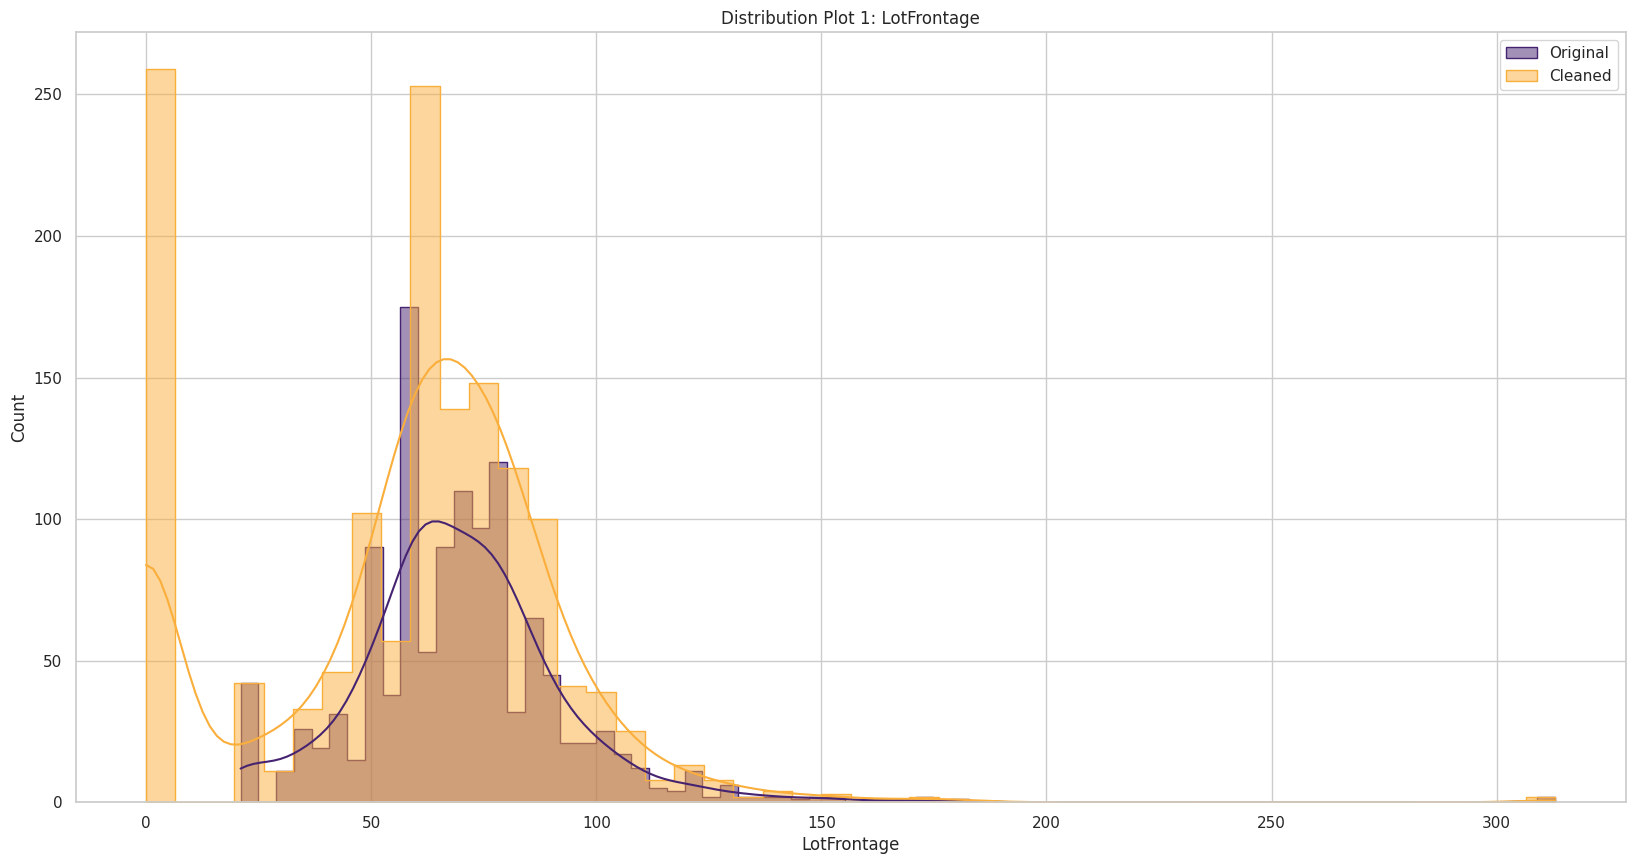

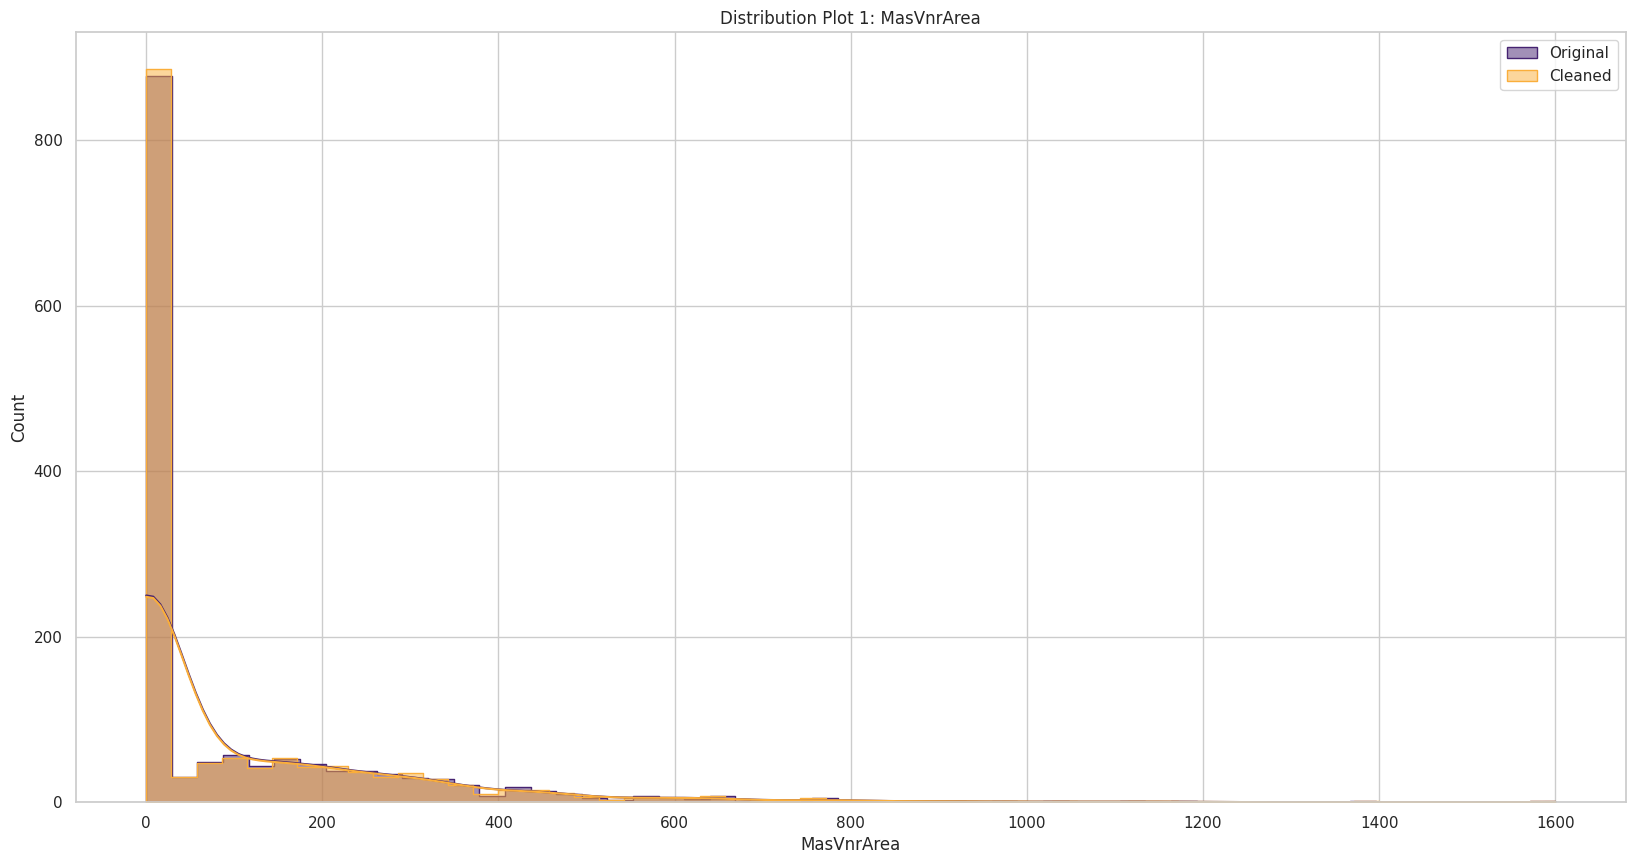

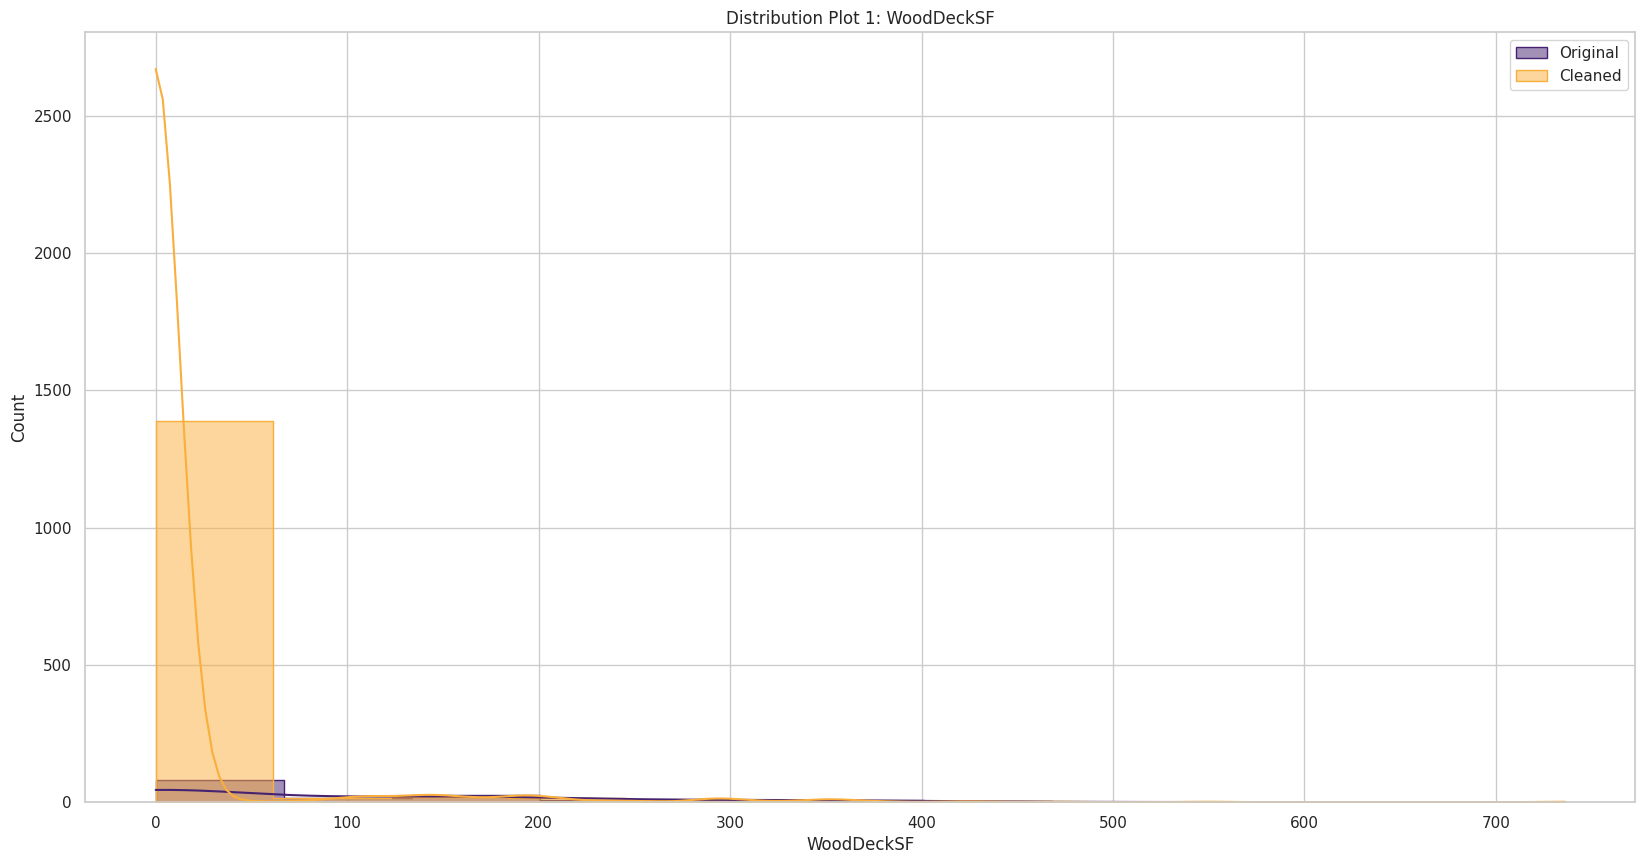

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline


def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):

    flag_count = 1  # Indicate plot number

    # distinguish between numerical and categorical variables
    categorical_variables = (df_original.select_dtypes(exclude=['number'])
                             .columns)

    # scan over variables,
    # first on variables that you applied the method
    # if the variable is a numerical plot, a histogram if
    # categorical plot a barplot
    for set_of_variables in [variables_applied_with_method]:
        print("\n===========================================================" +
              "==========================")
        print(f"* Distribution Effect Analysis After Data Cleaning Method in" +
              " the following variables:")
        print(f"{set_of_variables} \n\n")

    for var in set_of_variables:
        if var in categorical_variables:  # it is categorical variable: barplot
            df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var]})
            df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_cleaned[var]})
            dfAux = pd.concat([df1, df2], axis=0)
            fig, axes = plt.subplots(figsize=(20, 10))
            sns.countplot(hue='Type', data=dfAux, x="Value",
                          palette=['#462371', "#FAAE3B"])
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()

        else:  # it is numerical variable: histogram

            fig, axes = plt.subplots(figsize=(20, 10))
            sns.histplot(data=df_original, x=var, color="#462371",
                         label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#FAAE3B",
                         label='Cleaned', kde=True, element="step", ax=axes)
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.legend()

    plt.show()
    flag_count += 1


DataCleaningEffect(df, df_cleaned, missing_data_vars)


# Split Train and Test Set

In [31]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df_cleaned,
                                        df_cleaned['SalePrice'],
                                        test_size=0.2,
                                        random_state=0)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


* Confirming no missing data is present in the dataset.

In [32]:
evaluate_missing_data(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


In [33]:
evaluate_missing_data(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


# Pushing cleaned dataset files to Repo

* If you do not need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [34]:
import os
try:
  # create here your folder
  os.makedirs(name='outputs/datasets_collection/clean_datasets')
except Exception as e:
  print(e)


### Train Set File

In [35]:

TrainSet.to_csv(f"outputs/datasets_collection/clean_datasets/train_set_clean.csv",index=False)

### Test Set File

In [ ]:
TestSet.to_csv(f"outputs/datasets_collection/clean_datasets/test_set_clean.csv",index=False)